## TO DO LIST:
- **Preprocess the data**
- Is the glove the best numerical representation for this task
- Check out Naive bayes file in the Machine Learning files
- Remove the Match columns from the feature set
- Set a hard cut off at 236
- DO NOT RUSH and UNDERSTAND THE PROBLEM

In [113]:
import pandas as pd
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split, GridSearchCV
from sklearn.svm import SVC

In [15]:
# Preprocess the Data: from naivebayes2 (Melvin Adkins work)

lemmatizer = WordNetLemmatizer()


# Read in hand labeled data
filepath = "df_ver_combined_hand-labels.csv"
hand_label = "hand_label"
government = "['government']"
academia = "['academia']"

df = pd.read_csv(filepath, nrows=235) # reads in hand labeled data
df = df[((df[hand_label]=="['media']") | (df[hand_label]==academia) | (df[hand_label]==government) | (df[hand_label]=="['other']"))] # use single labels
df = df[['username','description',hand_label]] # keep only relevant columns

"""
filepath = "finalized_8K_accounts.csv"
hand_label = "hand.label"
government = "gov"
academia = "acad"

df = pd.read_csv(filepath)

df = df[((df[hand_label]=='media') | (df[hand_label]== academia) | (df[hand_label]==government) | (df[hand_label]=='other' ))]


df = df[['username','description',hand_label]] # keep only relevant columns
"""

# Preprocessing step - lemmatization on description column
words_not_changed = ['media']
def preprocessing(row):
    row = str(row).lower()          # lowercase (so that upper and lowercase words are treated the same)
    row = word_tokenize(row)   # tokenize  (to perform lemmitization)
    row = [lemmatizer.lemmatize(word) if word not in words_not_changed else word for word in row]   # lemmatize
    return str(row)            # convert back to string


df['description_lemmatized'] = df['description'].apply(preprocessing)


print(df.head())
print()

print(df.head())
print()
print('Number of labels per category:')
print(df[hand_label].value_counts())
print()

          username                                        description  \
0      annenbcnews  Chief Environmental Affairs Correspondent, NBC...   
1            USFSM  The official Twitter account for the Universit...   
2   KMillerWeather  Real estate and growth reporter for The Palm B...   
4  WhySharksMatter  Research associate at @ASU @ASUinDC studying s...   
5      Casper30214  Army Civil Service(Retired);Military Ops Resea...   

     hand_label                             description_lemmatized  
0     ['media']  ['chief', 'environmental', 'affair', 'correspo...  
1  ['academia']  ['the', 'official', 'twitter', 'account', 'for...  
2     ['media']  ['real', 'estate', 'and', 'growth', 'reporter'...  
4  ['academia']  ['research', 'associate', 'at', '@', 'asu', '@...  
5     ['other']  ['army', 'civil', 'service', '(', 'retired', '...  

          username                                        description  \
0      annenbcnews  Chief Environmental Affairs Correspondent, NBC...   


## Is Glove the best numerical representation of text for a supervised machine learning model?
I'm not sure. Let's test out a couple of different representations and their effects on the results.

In [16]:
# Creating a copy of the dataframe
data = df

### tf-idf

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(data['description_lemmatized'])

### Bag of Words

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()
X_bow = count_vectorizer.fit_transform(data['description_lemmatized'])

#########################################################################


In [19]:
# {'precomputed', 'rbf', 'sigmoid', 'linear', 'poly'}
def run_model(name, X_features):
    # Extract y_labels
    y_labels = data[hand_label]
    X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2, random_state=42, stratify=y_labels)
    svm_model = SVC(kernel="linear")

    # train the model
    svm_model.fit(X_train, y_train)

    # run predictions
    y_pred = svm_model.predict(X_test)
    # evaluate
    accuracy = accuracy_score(y_test, y_pred)
    print(name, "Accuracy:", accuracy)

In [20]:
run_model("TF-IDF", X_tfidf)
run_model("BAG OF WORDS", X_bow)

TF-IDF Accuracy: 0.7659574468085106
BAG OF WORDS Accuracy: 0.7659574468085106


# Answer:
To answer Dr. Roy's question, given the current data, gloVe does not seem to be the best numerical representation of the description.

########################################################################################################################
## Updated Work:
TODO:
- F-1
- Precision
- Recall

### Using Linear kernel function:
In text classification tasks, linear kernels can work well when the features are derived from text data, such as TF-IDF or bag-of-words representations. Many text classification problems, like sentiment analysis or spam detection, can have linearly separable classes.

For this task, it did show a higher accuracy than the other types of kernel functions.

In [127]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt



def run_model(name, X_features):
    y_labels = data[hand_label]
    X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2, random_state=43, stratify=y_labels)

    X_train = scaler.fit(X_train).transform(X_train)

    svm_model = SVC(kernel="linear")

    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    # micro
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0.0)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # macro
    macro_precision = precision_score(y_test, y_pred, average='macro', zero_division=0.0)
    macro_recall = recall_score(y_test, y_pred, average='macro')
    macro_f1 = f1_score(y_test, y_pred, average='macro')

    print(f"{name} Accuracy: {accuracy:.3f}")

    print(f"{name} Micro Precision: {precision:.3f} Macro Precision: {macro_precision:.3f}")
    print(f"{name} Micro Recall: {recall:.3f} Macro Recall: {macro_recall:.3f}")
    print(f"{name} Micro F1-score: {f1:.3f} Macro F1-score: {macro_f1:.3f}")

    print()

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[academia, government, 'media', 'other'])
    disp.plot()

    plt.title(name)
    plt.show()

run_model("TF-IDF", X_tfidf)
run_model("BAG OF WORDS", X_bow)


ValueError: Cannot center sparse matrices: pass `with_mean=False` instead. See docstring for motivation and alternatives.

# Figuring out Best Hyper parameters
This process is called hyperparameter tuning, where I will use techniques like cross-validation to determine the optimal values for my hyperparameters .

In [22]:
# pick candidate c values
candidate_c_values= [0.01, 0.03, 0.05, 0.10, 0.15, 1, 10, 50, 100 ]
print(candidate_c_values)

[0.01, 0.1, 1, 10, 50, 100]


The training set is used for training the SVM, the validation set is used to tune the hyperparameters, and the test set is used to evaluate the final model.

In [126]:
# split my data into training, validation, and test sets
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = df['description_lemmatized']
y_labels = data[hand_label]

X_train, X_test, y_train, y_test = train_test_split(X, y_labels, test_size=0.2, random_state=42, stratify=y_labels)


ValueError: could not convert string to float: "['the', 'official', 'twitter', 'account', 'of', 'the', 'florida', 'democratic', 'party', '.', 'voter', 'protection', 'hotline', ':', '(', '833', ')', 'vote-fla', 'http', ':', '//t.co/0hmsawp6fr', 'http', ':', '//t.co/hnhu5mrosn']"

In [79]:
print(X_train.shape)

(185,)


In [80]:
print(y_train)

55          ['other']
181         ['media']
64          ['media']
60          ['other']
168         ['media']
            ...      
229         ['media']
90          ['media']
160         ['media']
32     ['government']
194         ['media']
Name: hand_label, Length: 185, dtype: object


In [81]:
print(y_train.value_counts())

['media']         132
['government']     26
['other']          21
['academia']        6
Name: hand_label, dtype: int64


In [82]:
print(y_test.value_counts())

['media']         34
['government']     6
['other']          5
['academia']       2
Name: hand_label, dtype: int64


In [157]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline

tfidf_transformer = TfidfTransformer()
count_vectorizer = CountVectorizer(stop_words="english", min_df=0.015)


pipeline = Pipeline([
    ('vectorizer', count_vectorizer),
    ('transformer', tfidf_transformer),
    ('normalize', StandardScaler()),
    ('classifier', SVC())
])

param_grid = [
    {
        'vectorizer__min_df': [0, 0.01, 0.03, 0.05, 0.10, 0.15, 0.20],
        'transformer__use_idf': [True, False],
        'normalize__with_mean': [False],
        'classifier__C': [1.0e-10, 0.5, 2.0, 5.0, 10.0],
        'classifier__kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
    }
]

In [158]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 350 candidates, totalling 1750 fits


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
550 fits failed out of a total of 1750.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
250 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.9/li

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vectorizer',
                                        CountVectorizer(min_df=0.015,
                                                        stop_words='english')),
                                       ('transformer', TfidfTransformer()),
                                       ('normalize', StandardScaler()),
                                       ('classifier', SVC())]),
             param_grid=[{'classifier__C': [1e-10, 0.5, 2.0, 5.0, 10.0],
                          'classifier__kernel': ['linear', 'poly', 'rbf',
                                                 'sigmoid', 'precomputed'],
                          'normalize__with_mean': [False],
                          'transformer__use_idf': [True, False],
                          'vectorizer__min_df': [0, 0.01, 0.03, 0.05, 0.1, 0.15,
                                                 0.2]}],
             scoring='accuracy', verbose=1)

In [151]:
best_hyperparameters = grid_search.best_params_
print("Best ACCURACY:", grid_search.best_score_)
print("Best Hyperparameters:", best_hyperparameters)

print()

Best ACCURACY: 0.8
Best Hyperparameters: {'classifier__C': 2.0, 'classifier__kernel': 'sigmoid', 'normalize__with_mean': False, 'vectorizer__min_df': 0.01}



In [152]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)


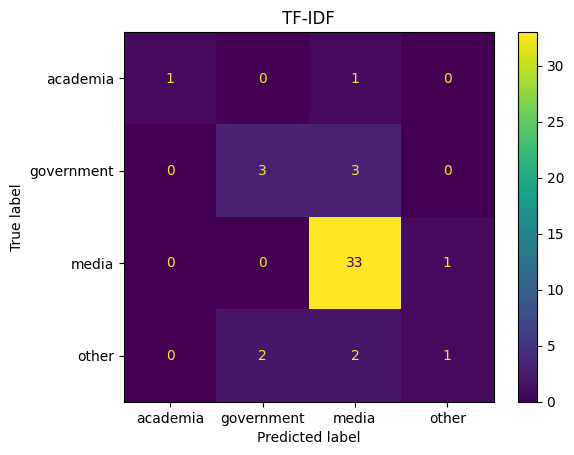

In [153]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['academia', 'government', 'media', 'other'])
disp.plot()

plt.title("TF-IDF")
plt.show()

Confusion Matrix for NB tfidf:


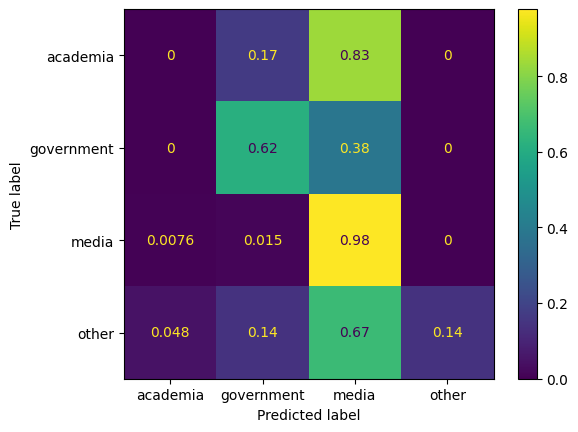

In [154]:
y_pred_tfidf = cross_val_predict(best_model, X_train, y_train, cv=5)

cm_tfidf = confusion_matrix(y_train, y_pred_tfidf, normalize='true')

disp_tfidf = ConfusionMatrixDisplay(confusion_matrix=cm_tfidf, display_labels=['academia', 'government', 'media', 'other'])

print('Confusion Matrix for NB tfidf:')
disp_tfidf.plot()
plt.show()

Confusion Matrix for NB tfidf:


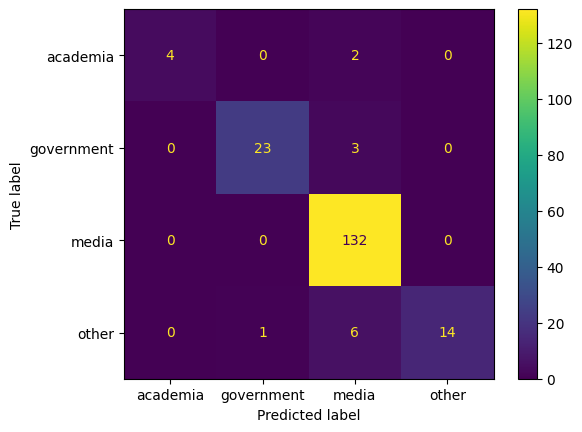

In [155]:

cm_tfidf = confusion_matrix(y_train, y_pred_train)

disp_tfidf = ConfusionMatrixDisplay(confusion_matrix=cm_tfidf, display_labels=['academia', 'government', 'media', 'other'])

print('Confusion Matrix for NB tfidf:')
disp_tfidf.plot()
plt.show()

In [156]:
from sklearn import metrics

print("TF-IDF Classification Report TRAIN:")
print(metrics.classification_report(y_train, y_pred_tfidf))
print()

print("TF-IDF Classification Report:")
print(metrics.classification_report(y_test, y_pred))
print()

TF-IDF Classification Report TRAIN:
                precision    recall  f1-score   support

  ['academia']       0.00      0.00      0.00         6
['government']       0.73      0.62      0.67        26
     ['media']       0.82      0.98      0.89       132
     ['other']       1.00      0.14      0.25        21

      accuracy                           0.80       185
     macro avg       0.64      0.43      0.45       185
  weighted avg       0.80      0.80      0.76       185


TF-IDF Classification Report:
                precision    recall  f1-score   support

  ['academia']       1.00      0.50      0.67         2
['government']       0.60      0.50      0.55         6
     ['media']       0.85      0.97      0.90        34
     ['other']       0.50      0.20      0.29         5

      accuracy                           0.81        47
     macro avg       0.74      0.54      0.60        47
  weighted avg       0.78      0.81      0.78        47


